## Linear Regression

0### OBJECTIVE: Understand and practice linear regression.
* Very important ! ***

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

**X and Y data**

In [0]:
#요기@@
x_train = [1, 2, 3, 4, 5]
y_train = [2+0.1+3, 4-0.3+3, 6+0.15+3, 8+0.1+3, 10-0.12+3] # Add some noise #bias를 3씩 주었다.

**Initialization**

In [0]:
#요기@@
#W = tf.Variable(tf.random_normal([1]), name='weight')
#b = tf.Variable(tf.random_normal([1]), name='bias')
w0 = 7.0; #최초값 #w0와 b0 값을 다르게 해보면서 실행시켜보기
b0 = 5.0;

W = tf.Variable(w0*tf.ones([1]), name='weight')  #tf = tensorflow
b = tf.Variable(b0*tf.ones([1]), name='bias')
#**최종적으로 이 W와b를 꺼내오고 싶은거임

Instructions for updating:
Colocations handled automatically by placer.


**Our hypothesis XW+b** #우리의 가설 #선으로 할꺼라는 걸 설명(곡선이 나오려면 제곱이 나오거나 해야하니까)

In [0]:
#요기@@
hypothesis = x_train * W + b

**cost/loss function**

In [0]:
#요기@@
cost = tf.reduce_mean(tf.square(hypothesis - y_train)) #선이 위로지나가면 +, 아래로 지나가면 - #square: 제곱 #가장 기초적인 cost #가설값과 y값의 거리의차이를 제곱을 통해 +, - 구분없이 절대적인 거리를 구하고 그값을 cost에 저장.(은)

**Optimizer**

In [0]:
#요기@@
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01) #에러를 보며 train을 풀어가는 것 #optimizer: 푸는 애 #학습속도:0.01(은)
train = optimizer.minimize(cost) #5번 문항의 cost를 최소화 해라


**Launch the graph in a session**

In [0]:
sess = tf.Session() #그래프 시행 시 세션 열어 수행.

**Initializes global variables in the graph.** 

In [0]:
sess.run(tf.global_variables_initializer()) #텐서플로우는 sess많이 나온다. #변수 초기화 시행.

In [0]:
for step in range(200): #아래 문법 설명위해 add
  if step %100 == 0:
    print(step)

0
100


In [0]:
#for step in range(2001): #step 이 1부터 2000까지
#    sess.run(train)
    
#    if step % 100 == 0:
#        w1 = sess.run(W)[0] # slope
#        b1 = sess.run(b)[0] # bias
#        print(step, sess.run(cost), w1, b1)
#요기@@
vw = [] #v 에 빈 그릇을 만든다.
vb = []
for step in range(200):
	sess.run(train)
	w1 = sess.run(W)[0] # slope
	b1 = sess.run(b)[0] # bias
	vw.append(w1)
	vb.append(b1)

	if step % 100 == 0:
		print(step, sess.run(cost), w1, b1)


(0, 197.93013, 5.779, 4.65972)
(100, 0.059207488, 1.8834463, 3.4043543)


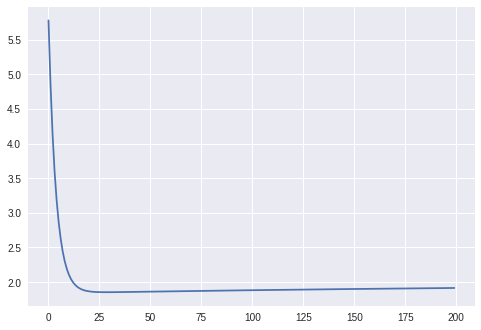

In [0]:
plt.plot(vw) #그림 만들어짐

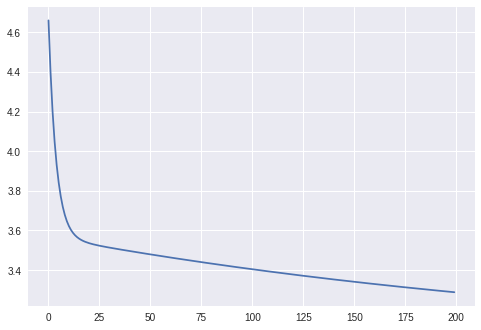

In [0]:
plt.plot(vb) #그림 만들어짐

**Complete training**

In [0]:
#요기@@
#정해진 시행이 끝난후, w값과 b값을 출력 # {y = (w1)*X + (b1)값을 출력}
w1 = sess.run(W)[0] # slope
b1 = sess.run(b)[0] # bias
str1 = 'y = ' + str(w1) +'x + ' + str(b1)
print(w1, b1)
print(str1)

(1.9155091, 3.2885978)
y = 1.9155091x + 3.2885978


Text(0.5,1,'y = 1.9155091x + 3.2885978')

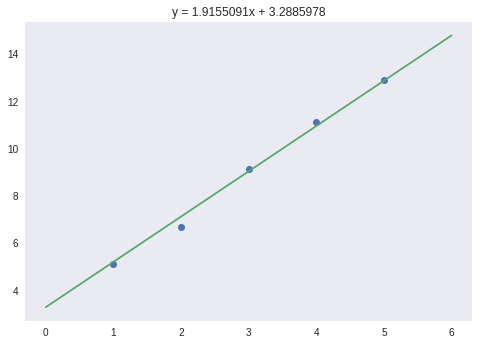

In [0]:
plt.figure(1)
plt.plot(x_train, y_train,'o')

x1 = np.linspace(np.min(x_train)-1, np.max(x_train)+1) #이 부분과 밑에 한 줄은 잘 몰라도 됨. 나중에 익숙해지면 다시 봐도됨. #위에는 적어놓은 점들을 동그랗게 그리라는거. 아래는 직선을 그리리는 거.
y1 = w1*x1 + b1
plt.plot(x1, y1)
plt.grid() 
plt.title(str1)